In [ ]:
#Install the necessary packages

!pip install yfinance
!pip install matplotlib==3.5.3

In [2]:
#Standard packages
import numpy as np
import pandas as pd

#Dates
from datetime import datetime, timedelta

#Finance packages
import yfinance as yf

#Statistics
from scipy.stats import t
from scipy.stats import skew, kurtosis

#Plotting packages
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import seaborn as sns

from matplotlib import rcParams

rcParams["font.size"] = 20
rcParams["axes.labelsize"] = 30

rcParams["xtick.labelsize"] = 16
rcParams["ytick.labelsize"] = 16

rcParams["figure.figsize"] = (8,6)

#Exercise 1. Correlation matrix - Basic analysis

The correlation matrix of $N$ random variables stores the correlations among each pair of variables. In an investment scenario, we are interested in computing the correlation matrix of the assets under consideration. As we have seen so far, the assets are characterized by the time-series of its returns, so we will compute the correlation among the return time series.

Given $N$ assets, with their returns given by $Y_i(t_k)$  with $t_k=k\Delta t; \ k=1,\dots,n$; $i=1,\dots, N$, we define the elements of the correlation matrix as

\begin{equation}
C_{ij}=\frac{1}{n}\sum_{k=1}^n\tilde{Y}_i(t_k)\tilde{Y}_j(t_k) \quad \textrm{with} \quad \tilde{Y}_i(t_k)=\frac{Y_i(t_k)-\mu_{Y_i}}{\sigma_{Y_i}}
\end{equation}

where $\mu_{Y_i}=\left<Y_i\right>_T$ is the mean of the return time series and $\sigma_{Y_i}=\sqrt{\left<Y_i^2\right>_T-\left<Y_i\right>_T^2}$

Let's download stock price data for different assets and compute the correlation matrix!


**1. Download the data**

In [3]:
start = '2013-01-01'
end = datetime.today().strftime('%Y-%m-%d')

#Apple, Microsoft, Amazon, Tesla, Google, Meta(Facebook), Telefonica, Indra, IBEX35
assets = ["AAPL", "MSFT", "AMZN",  "TSLA", "GOOGL", "META", "TEF.MC", "IDR.MC", "^IBEX"]

df = yf.download(assets, start=start, end=end, progress=False)["Adj Close"]

df

Ticker,AAPL,AMZN,GOOGL,IDR.MC,META,MSFT,TEF.MC,TSLA,^IBEX
Date,,,,,,,,,
2013-01-02,16.747723,12.865500,18.099348,9.476731,27.970324,22.532850,5.062139,2.357333,8447.590820
2013-01-03,16.536333,12.924000,18.109859,9.503937,27.740568,22.230999,5.052473,2.318000,8403.391602
2013-01-04,16.075716,12.957500,18.467718,9.540213,28.729517,21.814928,5.064556,2.293333,8435.791016
2013-01-07,15.981156,13.423000,18.387136,9.834943,29.388819,21.774139,5.050057,2.289333,8418.991211
2013-01-08,16.024160,13.319000,18.350851,9.476731,29.029200,21.659924,5.035560,2.245333,8452.991211
...,...,...,...,...,...,...,...,...,...
2024-05-01,169.300003,179.000000,163.860001,NaN,439.190002,394.940002,NaN,179.990005,NaN
2024-05-02,173.029999,184.720001,166.619995,18.040001,441.679993,397.839996,4.230000,180.009995,10872.000000
2024-05-03,183.380005,186.210007,167.240005,18.010000,451.959991,406.660004,4.261000,181.190002,10854.700195


**2. Compute the log returns**

In [4]:
# We compute the log returns, and also get rid of the possible NaN's
df_returns = np.log(1 + df.pct_change()).dropna()

**3. Compute the correlation matrix of the returns**

- Complete the function below to compute the autocorrelation matrix of a given DataFrame.

- Plot the results using seaborn `sns.heatmap()` function. What do you observe?

**Note:** *An efficient way of computing the correlation matrix is just using the `DataFrame.corr()`method. But it is useful to code it by hand at least once.*

In [5]:
def compute_correlation_matrix(df):

  N = len(df.columns)
  p = np.identity(N)

  # We compute all standard deviations and means
  stds = df.std()
  means = df.mean()
  for i in range(N):
    for j in range(i+1,N):

      S_i = (df.iloc[:,i]-means[i])/stds[i]
      S_j = (df.iloc[:,j]-means[j])/stds[j]

      mult = S_i*S_j
      p[i,j] = mult.mean()

      p[j,i] = p[i,j] #We already know that the correlation matrix is symmetric

  corr_mat = pd.DataFrame(p, columns=df.columns, index=df.columns)
  return corr_mat


In [6]:
corr_mat = compute_correlation_matrix(df_returns)

if np.sum(np.round(df_returns.corr().values, 4) == np.round(corr_mat.values, 4)) == len(df_returns.columns)**2:

  print("Test passed!")

else:

  print("Something went wrong...")

Something went wrong...


In [7]:
dif = corr_mat - df_returns.corr()
dif

Ticker,AAPL,AMZN,GOOGL,IDR.MC,META,MSFT,TEF.MC,TSLA,^IBEX
Ticker,,,,,,,,,
AAPL,0.000000,-0.000170,-0.000191,-0.000066,-0.000160,-0.000211,-0.000059,-0.000129,-0.000092
AMZN,-0.000170,0.000000,-0.000213,-0.000048,-0.000189,-0.000204,-0.000043,-0.000126,-0.000074
GOOGL,-0.000191,-0.000213,0.000000,-0.000065,-0.000200,-0.000231,-0.000075,-0.000119,-0.000107
IDR.MC,-0.000066,-0.000048,-0.000065,0.000000,-0.000054,-0.000071,-0.000121,-0.000049,-0.000174
META,-0.000160,-0.000189,-0.000200,-0.000054,0.000000,-0.000176,-0.000047,-0.000106,-0.000080
MSFT,-0.000211,-0.000204,-0.000231,-0.000071,-0.000176,0.000000,-0.000070,-0.000126,-0.000107
TEF.MC,-0.000059,-0.000043,-0.000075,-0.000121,-0.000047,-0.000070,0.000000,-0.000044,-0.000252
TSLA,-0.000129,-0.000126,-0.000119,-0.000049,-0.000106,-0.000126,-0.000044,0.000000,-0.000074
^IBEX,-0.000092,-0.000074,-0.000107,-0.000174,-0.000080,-0.000107,-0.000252,-0.000074,0.000000


Nothing went wrong actually, la matriu de correlació és exacte fins a quatre decimals, més que suficient.

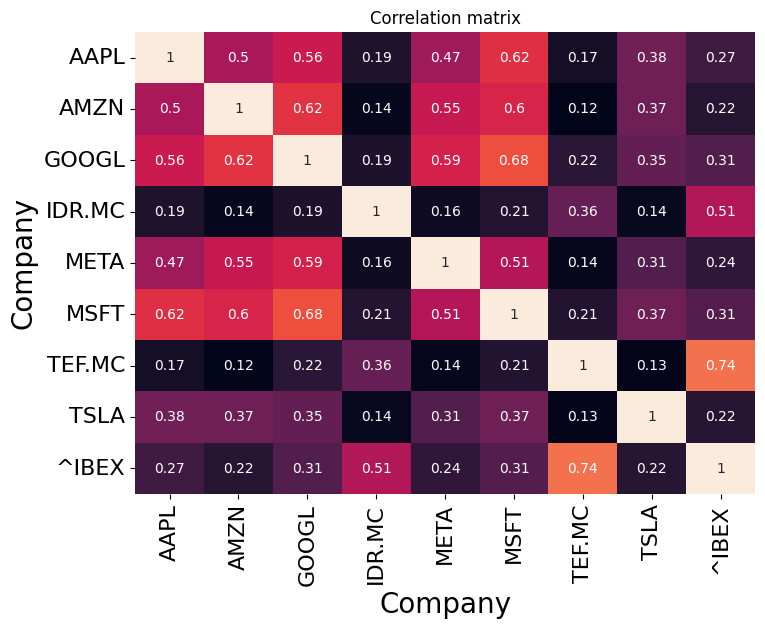

In [8]:
#PLOT

# Make fontsize more appealing
rcParams["font.size"] = 10
rcParams["axes.labelsize"] = 20

sns.heatmap(corr_mat, annot=True, cbar= False)
plt.title('Correlation matrix')
plt.ylabel('Company')
plt.xlabel('Company')
plt.show()

Podem veure, sobretot, importants correlacions entre totes les companyies tecnològiques (AAPL, AMZN, GOOGL, META i MSFT), tot i que la correlació més important és la que es dona entre l'Ibex i Telefònica. També és interessant veure la "des-correlació" de les empreses espanyoles (Indra i Telefònica) i de l'IBEX amb les empreses nord americanes.

**4. Compute the maximum and minimum correlations. Which are stocks having max and min correlations**

**Clue:** *Use the np.unravel_index(idx, matrix_shape) function to transform a flattened index to a cartesian one*

In [9]:
# To find màximum correlation outside of self-correlation, we substitute on the diagonal
col_max = corr_mat.replace(to_replace=1, value=0).max().idxmax()
idx_max = corr_mat.replace(to_replace=1, value=0)[col_max].idxmax()
corr_max = corr_mat.replace(to_replace=1, value=0).max().max()

col_min = corr_mat.min().idxmin()
idx_min = corr_mat[col_min].idxmin()
corr_min = corr_mat.min().min()

print(f"La màxima correlació es dona entre {col_max:6} i {idx_max:6}, amb corr: {corr_max:.2f}")
print(f"La mínima correlació es dona entre {col_min:6} i {idx_min:6}, amb corr: {corr_min:.2f}")

La màxima correlació es dona entre TEF.MC i ^IBEX , amb corr: 0.74
La mínima correlació es dona entre AMZN   i TEF.MC, amb corr: 0.12


**5. Compute the mean, variance and deviation of the correlations**

The deviation between each pair of assets with respect to the average correlation can be stored in another matrix, whose elements are given by

\begin{equation}
\delta_{ij}=\frac{C_{ij}-\mu_C}{\sigma_C}
\end{equation}

* Implement a function that return a DataFrame with the deviations, so that it can be plotted nicely with seaborn
* Plot the deviation matrix

**Clue:** *Use the `numpy.mean(x, axis)`, `numpy.var(x, axis)` and `numpy.std(x, axis)` methods*

In [10]:
def compute_deviation_matrix(df):

  N = len(df.columns)
  p = np.identity(N)

  # We compute all standard deviations and means
  std = df.stack().std()
  mean = df.stack().mean()
  for i in range(N):
    for j in range(i+1,N):

      p[i,j] = (df.iat[j,i]-mean)/std

      p[j,i] = p[i,j] #We already know that the correlation matrix is symmetric

  dev_mat = pd.DataFrame(p, columns=df.columns, index=df.columns)
  return dev_mat

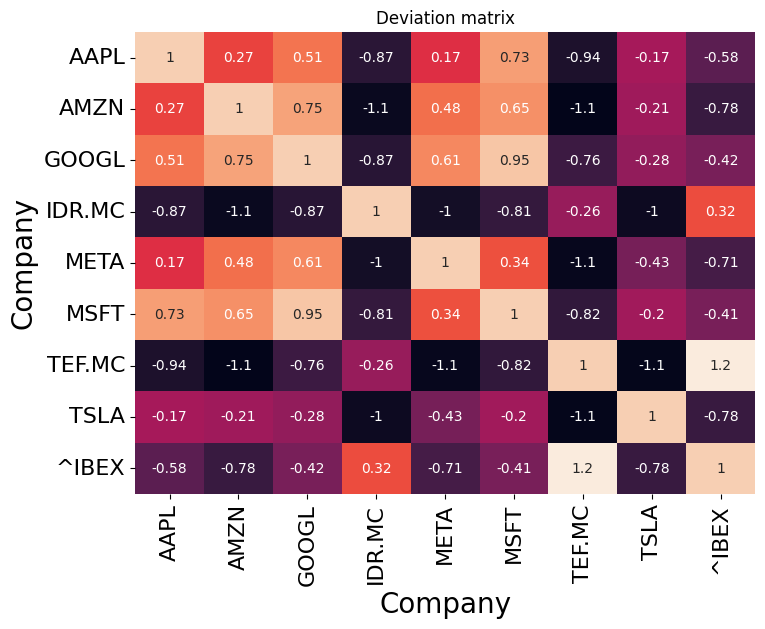

In [11]:
dev_mat = compute_deviation_matrix(corr_mat)
#PLOT

# Make fontsize more appealing
rcParams["font.size"] = 10
rcParams["axes.labelsize"] = 20

sns.heatmap(dev_mat, annot=True, cbar= False)
plt.title('Deviation matrix')
plt.ylabel('Company')
plt.xlabel('Company')
plt.show()

# Exercise 2. Distribution of pair correlations

**IMPORTANT:** *yfinance package returns the downloaded data in alphabetical order, so if the order of our ticker list is not alphabetical and is correlated with some other array, it will all mess up!*

- So it is good practice to build the ticker list and any correlated information in alphabetical order previous to downloading the data.

In [12]:
import requests
import bs4 as bs

resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

soup = bs.BeautifulSoup(resp.text, 'lxml')

table = soup.find('table', {'class': 'wikitable sortable'})

tickers = []
categories = []

for row in table.findAll('tr')[1:]:

    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

    category = row.findAll('td')[2].text
    categories.append(category)

tickers = [s.replace('\n', '') for s in tickers]

categories = np.array(categories)

sorted_idxs = np.argsort(tickers)

tickers = np.array(tickers)[sorted_idxs].tolist()

categories = categories[sorted_idxs]

start = datetime(2000,1,1)
end = datetime(2023,1,1)

print("This will take a while...")
df = yf.download(tickers, start=start, end=end)["Adj Close"].dropna(axis=1)

bools = np.array([True  if (ticker in df.columns.values) else False for ticker in tickers])

categories = categories[bools]

df_returns = np.log(1+df.pct_change()).dropna()

df_returns.index = df_returns.index.tz_localize(None)

df_returns

This will take a while...


[*********************100%%**********************]  503 of 503 completed
ERROR:yfinance:
6 Failed downloads:
ERROR:yfinance:['VLTO', 'SOLV', 'GEV', 'KVUE']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1672549200")
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2000-01-01 00:00:00 -> 2023-01-01 00:00:00)')
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Ticker,A,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WM,WMB,WMT,WRB,WST,WY,XEL,XOM,YUM,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.079464,-0.088077,-0.028988,-0.005450,-0.087618,-0.051914,-0.010471,0.000000,-0.049914,0.000000,...,-0.003604,-0.022427,-0.038136,-0.031253,0.010278,-0.038291,0.022766,-0.019340,-0.020305,-0.014533
2000-01-05,-0.064038,0.014527,-0.001840,0.088832,0.019578,0.014494,-0.015916,-0.009661,-0.065064,0.037955,...,0.003604,0.060018,-0.020619,-0.016000,-0.004099,0.051619,0.037859,0.053082,0.005116,0.018963
2000-01-06,-0.038820,-0.090514,0.034392,-0.010050,0.008130,-0.027719,0.005333,0.013261,-0.062859,-0.003731,...,-0.007221,0.021135,0.010853,0.056442,-0.010320,0.045717,-0.009331,0.050406,-0.008540,-0.055665
2000-01-07,0.080043,0.046281,0.010620,0.054067,0.047440,0.027719,0.015832,0.022499,0.112050,0.014842,...,-0.040671,0.026267,0.072846,-0.015362,0.010320,-0.033436,0.000000,-0.002939,-0.022551,-0.011160
2000-01-10,0.058813,-0.017744,-0.007067,0.032944,0.037883,0.083468,0.000000,0.024293,-0.010151,-0.007394,...,0.003766,-0.018692,-0.018417,-0.009331,0.020327,-0.004369,0.000000,-0.014080,0.039558,0.033114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.001475,-0.002802,0.001388,0.008397,0.005719,0.000549,0.012014,0.007415,0.000319,0.013154,...,0.009339,0.022766,0.002019,0.006419,-0.000553,0.014071,0.012770,0.026101,0.000621,0.002864
2022-12-27,0.002142,-0.013976,0.003599,0.003779,-0.009977,-0.010060,0.013541,0.000373,-0.009988,0.008342,...,0.001820,0.002697,0.000278,0.006243,0.006782,-0.000635,0.008982,0.013798,0.007728,0.011137
2022-12-28,-0.009810,-0.031166,-0.006839,-0.016163,-0.020380,-0.011908,-0.024166,-0.013281,-0.023848,-0.010019,...,-0.013444,-0.020869,-0.017678,-0.015132,-0.023464,-0.027055,-0.007229,-0.016563,-0.004552,-0.016713


**1. Annual distribution of correlations**

- Compute the correlation matrix for each year in the downloaded period
- Plot the distribution of the correlations for each year (it would be nice to make an animation)

What do you observe?

In [13]:
# We create a list to store all the dataframes generated
correlations = []

# We select the prices for each year, then compute and store the correlations
for i in range(23):
  year = 2000 + i
  filtered = df_returns.loc[df_returns.index.year == year]
  corr_mat = filtered.corr().replace(to_replace=1, value=np.nan)
  correlations.append(corr_mat.stack())


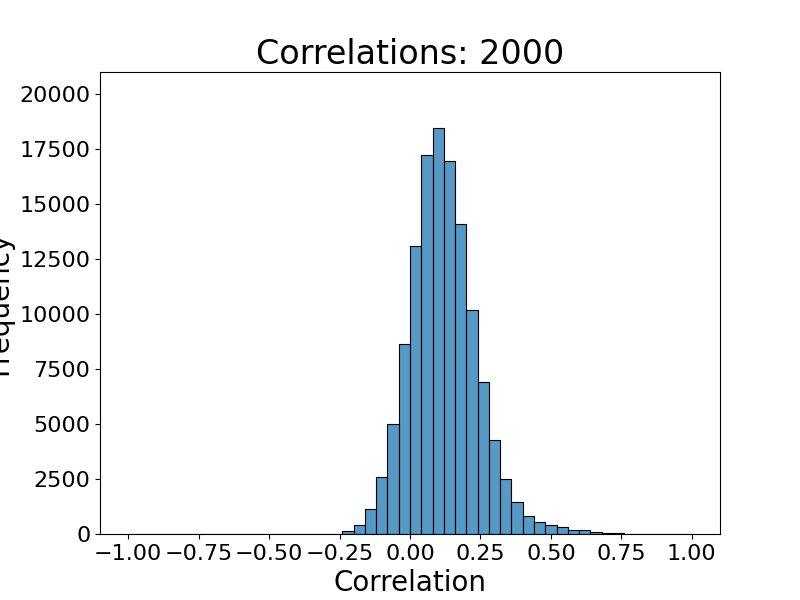

In [14]:
from matplotlib.animation import FuncAnimation
rcParams["font.size"] = 20
def update(i):
  year= 2000+i

  plt.clf()
  plt.title(f'Correlations: {year}')
  plt.ylabel('Freqüency')
  plt.xlabel('Correlation')
  plt.ylim(0,21000)
  sns.histplot(correlations[i], bins=50, binrange=(-1,1))


figure, ax = plt.subplots(figsize=(8, 6))


anim = FuncAnimation(figure,
                          func = update,
                          frames = 23,
                          interval=700,
                          )
anim.save("ani.gif")

plt.close()

from IPython.display import Image

Image(url='...')  # external
fname = '/content/ani.gif'
Image(open(fname, 'rb').read())  # local

Gràcies a l'animació es pot veure que els anys on ocorren events històrics importants per els mercats financers (com la crisi del 2008 i els anys posteriors, i com la recessió provocada el 2020 pel COVID) les correlacions augmenten molt.

**2. Plot the mean and volatility (standard deviation) of the annual distribution for each year**

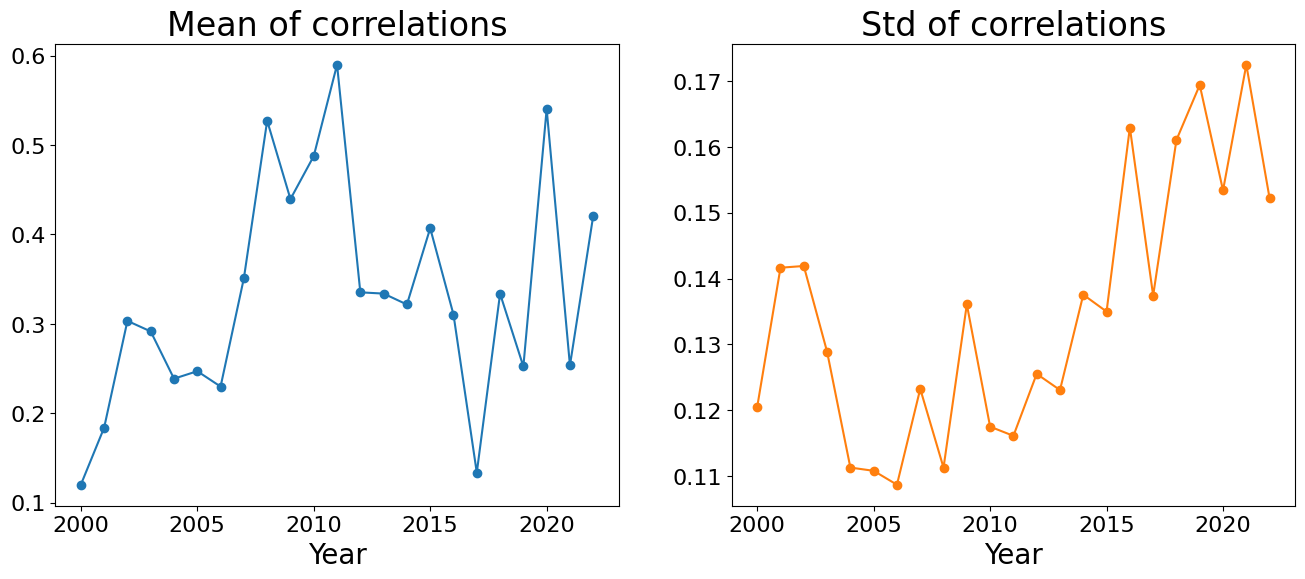

In [15]:
means = []        # Initialise the list to store the means
vols = []         # Initialise the list to store the volatility
labels = []       # Also create a list to store the labels
i=0
for df in correlations:         # Loop though all the correlations
  means.append(df.mean())
  vols.append(df.std())
  labels.append(2000+i)
  i =i+ 1

fig, ax = plt.subplot_mosaic("""AB""", figsize=(8*2, 6))
ax['A'].plot(labels,means ,marker='o')
ax['A'].set_title("Mean of correlations")
ax['A'].set_xlabel("Year")
ax['B'].plot(labels,vols,marker='o',color='C1')
ax['B'].set_title("Std of correlations")
ax['B'].set_xlabel("Year")
plt.show()

També es diu que la desviació estandard de les correlacions augmenta en temps de crisi, i de certa manera es pot veure en el segon gràfic.

# Exercise 3. Asset graph

A graph (or network) is a structure amounting to a set of objects in which some pairs of the objects are in some sense "related". The objects correspond to mathematical abstractions called vertices (also called nodes or points) and each of the related pairs of vertices is called an edge (also called link or line). Typically, a graph is depicted as a set of circles for the vertices joined by lines or curves for the edges.

The edges may be directed or undirected. For example, if the vertices represent people at a party, and there is an edge between two people if they shake hands, then this graph is undirected because any person A can shake hands with a person B only if B also shakes hands with A. In contrast, if an edge from a person A to a person B means that A owes money to B, then this graph is directed, because owing money is not necessarily reciprocated.

The network can be weighted or unweighted, this is, the links can have different values corresponding to the "strength" of the interactions or only take binary values (0:no link, 1:link), indicating the existence or not of a relation.

**NetworkX** is the main Python library for working with networks (https://networkx.org/)

In our case, the asset graph is an undirected weighted graph in which the nodes correspond to different assets and the links are the correlation coefficients among them.

**1. Complete the function below to build the asset graph and plot the result**

Here I already provide all the code for the plot, but feel free to explore in the documentation of NetworkX for other layaouts and other settings! Later you will have to do the network plots yourselves (just copy the code here and re-use it)

**Clue:** *Use the `G.add_edge(node_1_idx, node_2_idx, weight=w)` method*

In [16]:
import networkx as nx

def asset_graph(corr_mat, threshold):

  #Set number of nodes
  N = corr_mat.shape[0]

  #Build an empty graph
  G = nx.Graph()

  #Add nodes
  G.add_nodes_from(np.arange(0, N, 1))

  N = len(corr_mat)
  #Add links between each pair of nodes if some criteria is met (in this case, p_ij>threshold)
  for i in range(N):
    for j in range(i+1,N):
      node_1_idx = i
      node_2_idx = j
      if corr_mat[i,j] >= threshold and i != j: G.add_edge(node_1_idx, node_2_idx, weight=corr_mat[i,j])

  return G

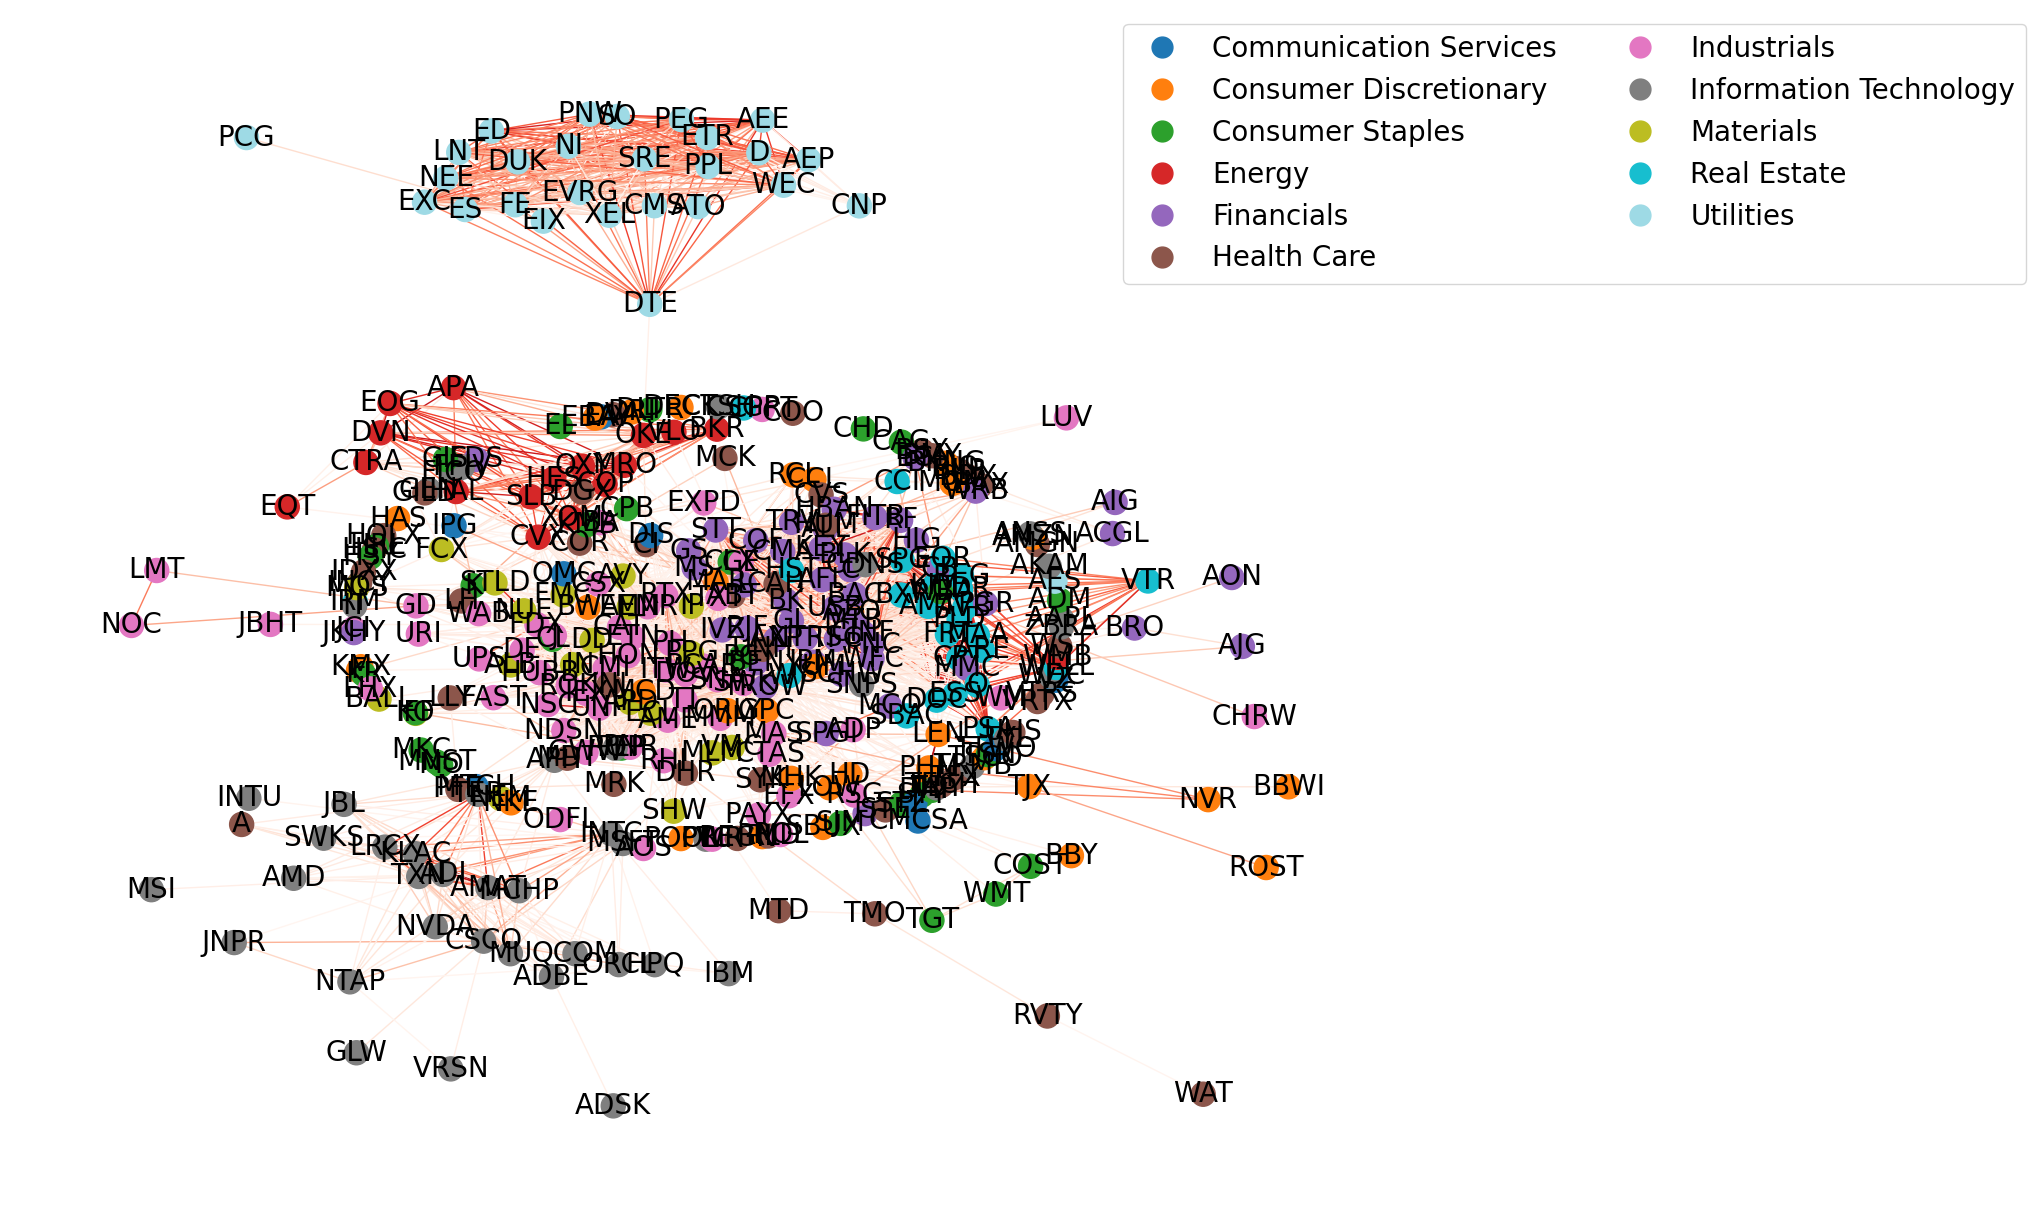

In [17]:
threshold = 0.5

#Compute correlation matrix
corr_mat = df_returns.corr()

#Build network with given threshold value
G = asset_graph(corr_mat.values, threshold)

#Obtain the edges and their weights from the network
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())

#Names of assets (nodes)
labels = dict(zip(np.arange(0, corr_mat.shape[0], 1), corr_mat.columns.values))

#Add color for each category
color_code = np.copy(categories)

unique_categories = np.unique(categories)

cmap = mpl.cm.get_cmap('tab20', len(unique_categories))

colors = [mpl.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

for i in range(len(unique_categories)):

  color_code[categories == unique_categories[i]] = colors[i]

#Plot
plt.figure(figsize=(14, 12))

nx.draw(G, pos = nx.kamada_kawai_layout(G), edgelist=edges, node_color=color_code, edge_color=weights, edge_cmap=plt.cm.Reds, with_labels=True,
        labels=labels, font_size=20)

legend_elements = [Line2D([0], [0], ls="", marker='o', color=colors[i], label=unique_categories[i], markerfacecolor=colors[i], markersize=15)
 for i in range(len(unique_categories))]

plt.legend(handles=legend_elements, loc="upper right", ncol=2, bbox_to_anchor=(1.45, 1))

# Exercise 4. Distances, Minimum Spanning Tree & Hierarchical Tree

The correlations between each pair of assets allow to define a distance (in the mathematical sense) between them. It can be shown that this distance can be easily computed as

\begin{equation}
d_{ij}=\sqrt{2(1-C_{ij})}
\end{equation}

Thus, the more correlation between a pair of assets, the less distance between them.

The concept of distance between assets, in turn, allows to compute the **Minimum Spanning Tree (MST)** of the asset graph.

In graph theory, a **tree** is a graph in which every pair of nodes is connected by only one path. A **spanning tree** of a given graph is a *tree* that connects all its nodes. Given a *weighted graph*, its **MST** is the *spanning tree* that minimizes the sum of its edge weights.

Thus, to compute the **MST** of the asset graph we first have to compute the distance matrix and use this distance matrix to construct the asset graph (fully connected, no threshold needed now). Finally, we can easily compute the **MST** using NetworkX.

From the distance matrix we can also compute the **Hierarchical tree** associated to the **MST** using SciPy.

**1. Create a function to compute the distance matrix**

In [18]:
def compute_distance_matrix(df):
  N = len(df)
  p = np.identity(N)

  for i in range(N):
    for j in range(i,N):
      p[i,j] = np.sqrt(2*(1-df.iat[i,j]))
      p[j,i] = p[i,j]                       # The distance matrix should be too, symetric

  dist_mat = pd.DataFrame(p, columns=df.columns, index=df.columns)
  return dist_mat


**2. Create a function to create a fully connected and weighted network from the distance matrix (nodes are connected to each other with a weight corresponding to the distance between them).**

**Note:** *Modify the `asset_graph` function implemented before*

In [19]:
threshold = 0
dist_mat = compute_distance_matrix(corr_mat)
G = asset_graph(dist_mat.values, threshold)

**3. Compute the Minimum Spanning Tree**

To do so, you first have to compute the distance matrix and then generate the fully connected and weighted network. From this network you can compute the MST with `networkx.minimum_spanning_tree(G)` method.

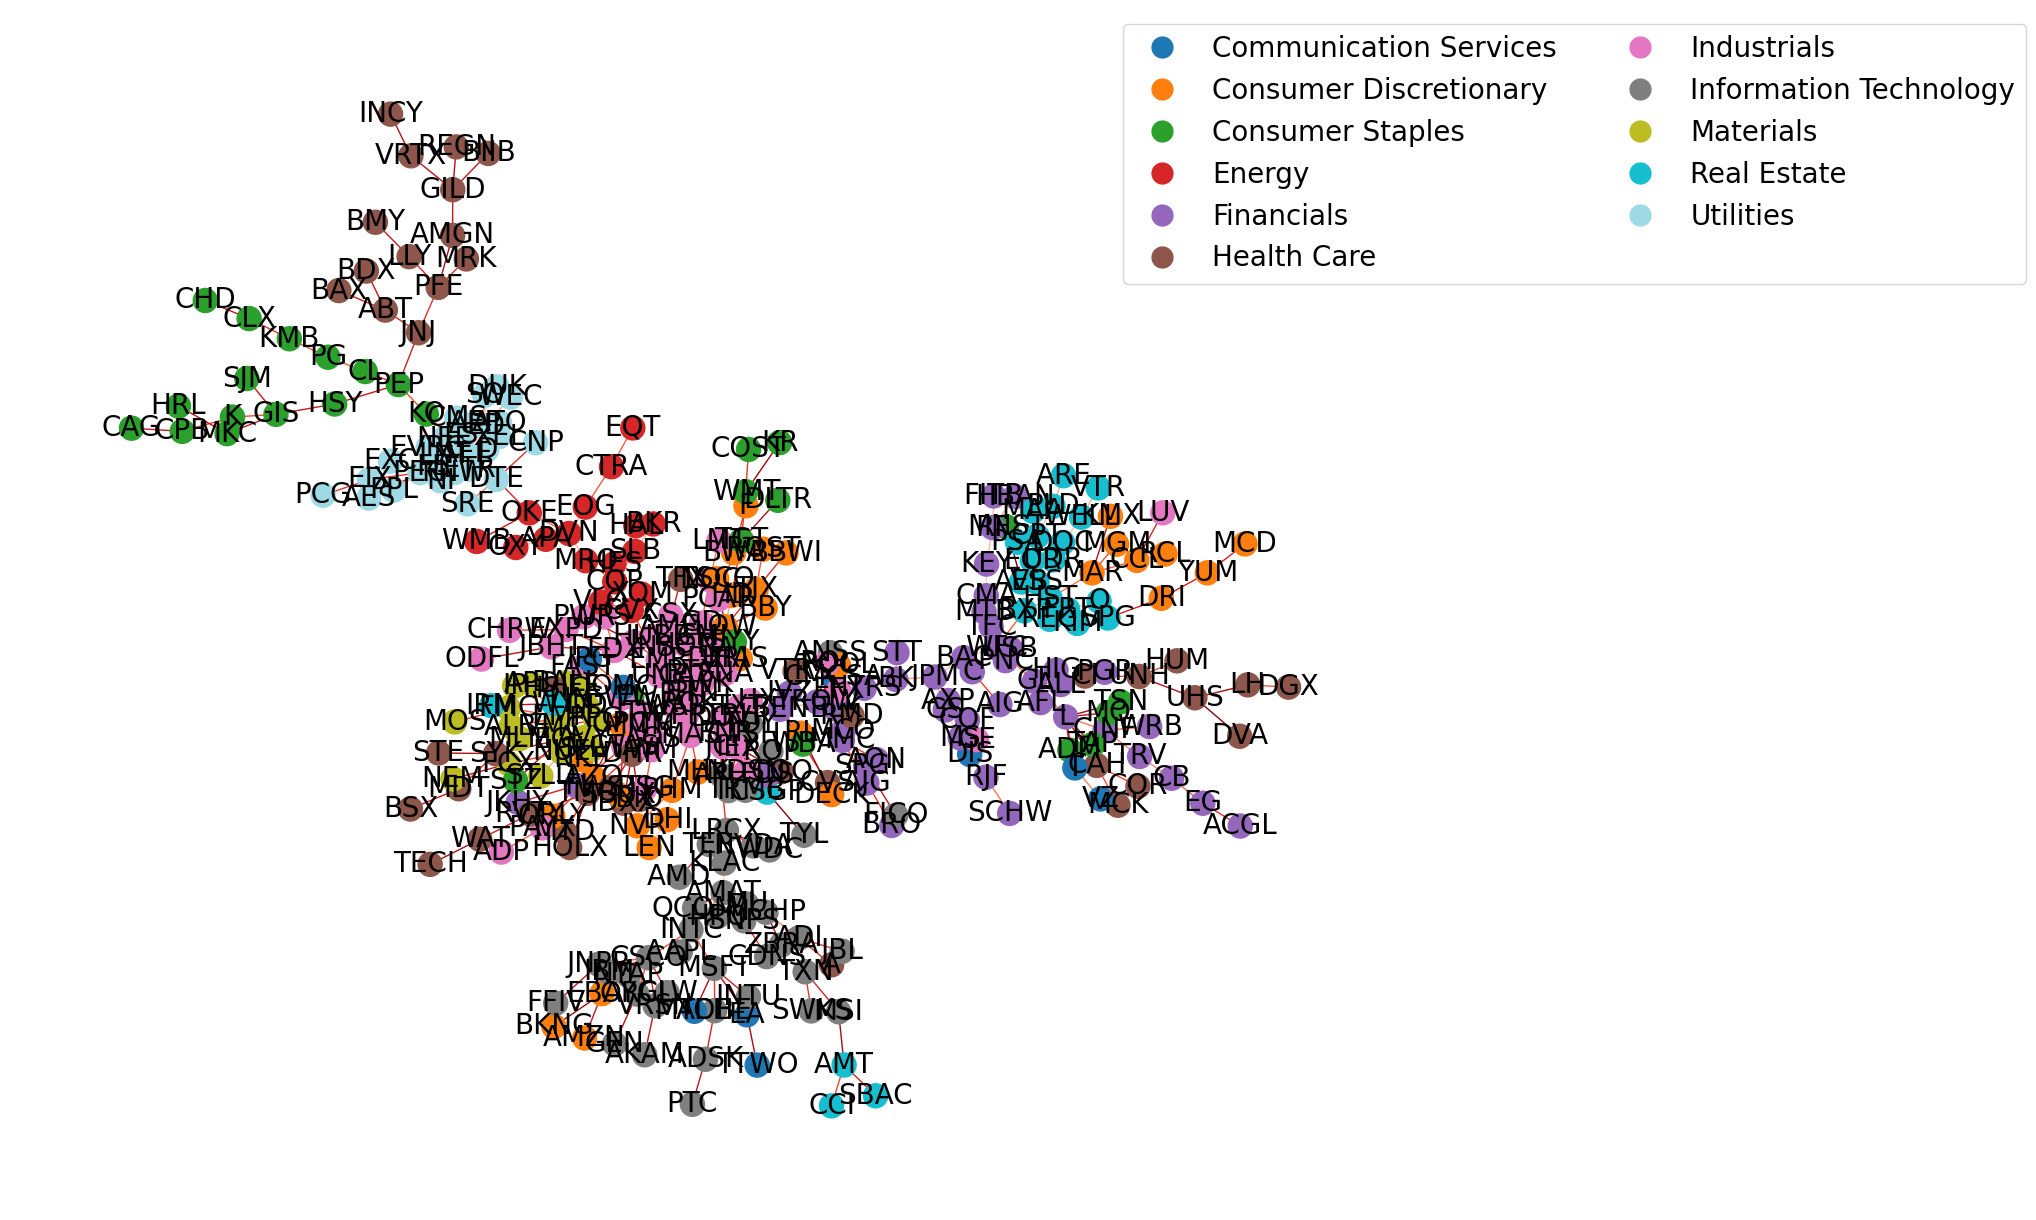

In [20]:
T = nx.minimum_spanning_tree(G)

edges, weights = zip(*nx.get_edge_attributes(T, 'weight').items())

#Names of assets (nodes)
labels = dict(zip(np.arange(0, corr_mat.shape[0], 1), corr_mat.columns.values))

#Add color for each category
color_code = np.copy(categories)

unique_categories = np.unique(categories)

cmap = mpl.cm.get_cmap('tab20', len(unique_categories))

colors = [mpl.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

for i in range(len(unique_categories)):

  color_code[categories == unique_categories[i]] = colors[i]

#Plot
plt.figure(figsize=(14, 12))

nx.draw(G, pos = nx.kamada_kawai_layout(T), edgelist=edges, node_color=color_code, edge_color=weights, edge_cmap=plt.cm.Reds, with_labels=True,
        labels=labels, font_size=20)

legend_elements = [Line2D([0], [0], ls="", marker='o', color=colors[i], label=unique_categories[i], markerfacecolor=colors[i], markersize=15)
 for i in range(len(unique_categories))]

plt.legend(handles=legend_elements, loc="upper right", ncol=2, bbox_to_anchor=(1.45, 1))

**2. Compute the associated hierarchical tree**

- Convert the vector-form distance matrix to a square-form distance matrix using `scipy.spatial.distance.squareform(x)` method

- Create the hierarchical tree using `scipy.cluster.hierarchy.dendogram(matrix, method, metric) ` method using `ward` method and `euclidian`distance

- Plot the tree using the `scipy.cluster-hierarchy(linkage_data)` method

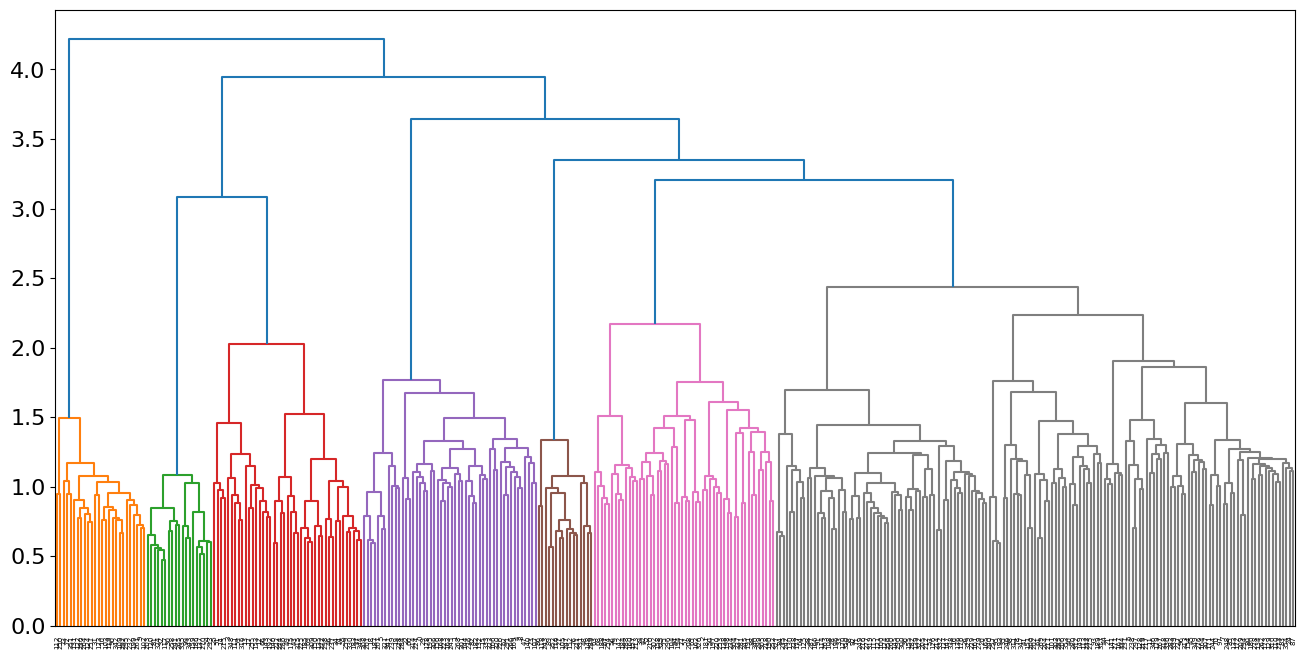

In [38]:
import scipy as sy

# We convert to a vector-form matrix
new_dist_mat = sy.spatial.distance.squareform(dist_mat.values)

# Create the hierarchical tree
tree = sy.cluster.hierarchy.linkage(new_dist_mat, method="ward", metric="euclidean")

plt.figure(figsize=(16,8))
sy.cluster.hierarchy.dendrogram(tree)
plt.show()
